In [7]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
# run only once
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [8]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                               include_top=False,
                               weights='imagenet')

In [9]:
for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

In [10]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [10]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(units=1024, activation='relu')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

# model.summary()

In [11]:
import os
from pathlib import Path
home = str(Path.home())
base_dir = os.path.join(home, 'datasets/cats_and_dogs_filtered')

In [12]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [13]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

1000
1000
500
500


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=100,
    validation_steps=50,
    verbose=2
)

Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 - 16s - loss: 0.3044 - accuracy: 0.8710 - val_loss: 0.2768 - val_accuracy: 0.9560
Epoch 2/10
100/100 - 15s - loss: 0.2897 - accuracy: 0.8800 - val_loss: 0.3661 - val_accuracy: 0.9470
Epoch 3/10
100/100 - 15s - loss: 0.3029 - accuracy: 0.8815 - val_loss: 0.3328 - val_accuracy: 0.9490
Epoch 4/10
100/100 - 15s - loss: 0.2567 - accuracy: 0.8935 - val_loss: 0.3467 - val_accuracy: 0.9520
Epoch 5/10
100/100 - 16s - loss: 0.2724 - accuracy: 0.8890 - val_loss: 0.5028 - val_accuracy: 0.9330
Epoch 6/10
100/100 - 16s - loss: 0.2485 - accuracy: 0.9035 - val_loss: 0.5963 - val_accuracy: 0.9270
Epoch 7/10
100/100 - 16s - loss: 0.2641 - accuracy: 0.9025 - val_loss: 0.4348 - val_accuracy: 0.9450
Epoch 8/10
100/100 - 16s - loss: 0.2509 - accuracy: 0.8980 - val_loss: 0.4633 - val_accuracy: 0.9470
Epoch 9/10
100/100 - 15s - loss: 0.2644 - accuracy: 0.9015 - val_loss: 0.4259 - val_accuracy: 0.9510
Epoch 10/10
100/100 - 15s - loss: 0.2305 - accur

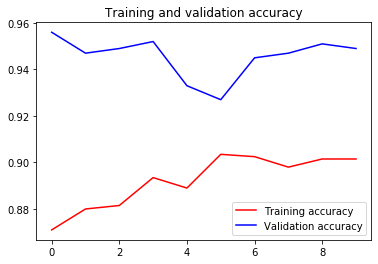

<Figure size 432x288 with 0 Axes>

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()